---
> # <b><font color = "Blue">LoanTap_Logistic_Regression</font> </b>

>> **Analyst:** Sabarish S <br>
>> **Email:** [sabarish.analytics@gmail.com](mailto:selvamsabarish1998@gmail.com)  
>> **LinkedIn:** [Sabarish Selvam](https://www.linkedin.com/in/sabarishselvam/)  
>> **Date of Completion:** 2024-12-22
---

### **1. Data Dictionary**

- **loan_amnt**:  
  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

- **term**:  
  The number of payments on the loan. Values are in months and can be either 36 or 60.

- **int_rate**:  
  Interest rate on the loan.

- **installment**:  
  The monthly payment owed by the borrower if the loan originates.

- **grade**:  
  LoanTap assigned loan grade.

- **sub_grade**:  
  LoanTap assigned loan subgrade.

- **emp_title**:  
  The job title supplied by the borrower when applying for the loan.

- **emp_length**:  
  Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years.

- **home_ownership**:  
  The home ownership status provided by the borrower during registration or obtained from the credit report.

- **annual_inc**:  
  The self-reported annual income provided by the borrower during registration.

- **verification_status**:  
  Indicates if income was verified by LoanTap, not verified, or if the income source was verified.

- **issue_d**:  
  The month which the loan was funded.

- **loan_status**:  
  Current status of the loan - *Target Variable*.

- **purpose**:  
  A category provided by the borrower for the loan request.

- **title**:  
  The loan title provided by the borrower.

- **dti**:  
  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

- **earliest_cr_line**:  
  The month the borrower's earliest reported credit line was opened.

- **open_acc**:  
  The number of open credit lines in the borrower's credit file.

- **pub_rec**:  
  Number of derogatory public records.

- **revol_bal**:  
  Total credit revolving balance.

- **revol_util**:  
  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

- **total_acc**:  
  The total number of credit lines currently in the borrower's credit file.

- **initial_list_status**:  
  The initial listing status of the loan. Possible values are `W`, `F`.

- **application_type**:  
  Indicates whether the loan is an individual application or a joint application with two co-borrowers.

- **mort_acc**:  
  Number of mortgage accounts.

- **pub_rec_bankruptcies**:  
  Number of public record bankruptcies.

- **Address**:  
  Address of the individual.


### **2. Pre-Requisites**

In [47]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from IPython.display import display, Markdown
import scipy.stats as stats
import re
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency, ttest_ind



# Set display options for pandas
# '''
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# '''
# Suppress only RuntimeWarnings

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### **3. Data Import**

In [48]:
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:00<00:00, 212MB/s] 


In [49]:
# Read the CSV file into a pandas DataFrame with specified data types

df = pd.read_csv("logistic_regression.csv")
df.columns = df.columns.str.strip()

In [50]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


### **4. Helper Function**

In [51]:
# Function to print basic useful details for a given column
def get_column_details(df,column):
    print("Details of",column,"column")

    #DataType of column
    print("\nDataType: ",df[column].dtype)

    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())

    #Get Distribution of Column
    print("\nDistribution of column:\n")
    print(df[column].value_counts())


def fill_missing_with_group_mode(df, groupby, column):
    print("\nNo. of missing values before filling with group mode:",df[column].isnull().sum())

    # Assign None to np.NaN
    if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN

    # Fill with local mode
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    df[column] = df[column].fillna(mode_per_group)

    print("\nNo. of missing values after filling with group mode:",df[column].isnull().sum())


def df_describe_num(df):
    df.describe().T
    d = df.describe().T
    d["no. of nulls"] = df.shape[0]-d["count"]
    d["prt of nulls"] = (d["no. of nulls"] / df.shape[0] * 100)
    return d.round(2)

def df_describe_cat(df):
    d = df.describe(exclude=np.number).T
    d["no. of nulls"] = df.shape[0]-d["count"]
    d["prt of nulls"] = (d["no. of nulls"] / df.shape[0] * 100)
    return d.round(2)



def chi_square_test(df, col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab_melted = crosstab.reset_index().melt(id_vars=[col1], var_name=col2, value_name='Count')

    plt.figure(figsize=(6, 4))
    sns.barplot(x=col1, y='Count', hue=col2, data=crosstab_melted)
    plt.title(f'{col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.show()

    chi2, p_value, _, _ = chi2_contingency(crosstab)
    result = " 🔴 Reject" if p_value < 0.05 else "🟢 Fail to Reject"
    inference = "There is a significant relationship between" if p_value < 0.05 else "No significant relationship between"
    print(f"Chi-Square Test: {col1} vs {col2} | Chi2: {chi2:.4f}, p-value: {p_value:.4f} -> {result} Null Hypothesis")
    print(f"Inference: {inference} {col1} and {col2}.\n")


def ttest(df, col1, col2):
    groups = df[col2].unique()
    group1 = df[df[col2] == groups[0]][col1]
    group2 = df[df[col2] == groups[1]][col1]

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col2, y=col1, data=df)
    plt.title(f'{col1} by {col2}')
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.show()

    t_stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
    result = " 🔴 Reject" if p_value < 0.05 else "🟢 Fail to Reject"
    inference = "There is a significant difference in" if p_value < 0.05 else "No significant difference in"
    print(f"T-Test: {col1} vs {col2} | T-stat: {t_stat:.4f}, p-value: {p_value:.4f} -> {result} Null Hypothesis")
    print(f"Inference: {inference} {col1} between {groups[0]} and {groups[1]}.\n")


# Function to remove outliers using IQR
# Capping Outliers from Numerical Cols
def clean_dataframe_outliers(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64'])
    df_cleaned = df.copy()
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned


### **Checking the Structure and Characterestics of data**

In [52]:
df.shape

(396030, 27)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [54]:
# Categorical Columns Info
df.describe(exclude=np.number).T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [55]:
# Numerical Columns Info
df_describe_num(df)

,count,mean,std,min,25%,50%,75%,max,no. of nulls,prt of nulls
loan_amnt,396030.0,14113.89,8357.44,500.00,8000.00,12000.00,20000.00,40000.00,0.0,0.00
int_rate,396030.0,13.64,4.47,5.32,10.49,13.33,16.49,30.99,0.0,0.00
installment,396030.0,431.85,250.73,16.08,250.33,375.43,567.30,1533.81,0.0,0.00
annual_inc,396030.0,74203.18,61637.62,0.00,45000.00,64000.00,90000.00,8706582.00,0.0,0.00
dti,396030.0,17.38,18.02,0.00,11.28,16.91,22.98,9999.00,0.0,0.00
open_acc,396030.0,11.31,5.14,0.00,8.00,10.00,14.00,90.00,0.0,0.00
pub_rec,396030.0,0.18,0.53,0.00,0.00,0.00,0.00,86.00,0.0,0.00
revol_bal,396030.0,15844.54,20591.84,0.00,6025.00,11181.00,19620.00,1743266.00,0.0,0.00
revol_util,395754.0,53.79,24.45,0.00,35.80,54.80,72.90,892.30,276.0,0.07
total_acc,396030.0,25.41,11.89,2.00,17.00,24.00,32.00,151.00,0.0,0.00


In [56]:
for i in df.columns:
  print("\n🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨\n")
  print(i)
  get_column_details(df,i)


🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨

loan_amnt
Details of loan_amnt column

DataType:  float64

There are no null values

Number of Unique Values:  1397

Distribution of column:

loan_amnt
10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
36225.0        1
950.0          1
37800.0        1
30050.0        1
725.0          1
Name: count, Length: 1397, dtype: int64

🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨

term
Details of term column

DataType:  object

There are no null values

Number of Unique Values:  2

Distribution of column:

term
36 months    302005
60 months     94025
Name: count, dtype: int64

🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨

int_rate
Details of int_rate column

DataType:  float64

There are no null values

Number of Unique Values:  566

Distribution of column:

int_rate
10.99    12411
12.99     9632
15.61     9350
11.99     8582
8.90      8019
         ...  
14.28        1
18.72        1
18.36        1
30.84        1
24.59        1
Name: count, Length: 566, dtype

### **5. Data Cleaning**

In [57]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [58]:
display(df_describe_cat(df),df_describe_num(df))

,count,unique,top,freq,no. of nulls,prt of nulls
term,396030,2,36 months,302005,0,0.0
grade,396030,7,B,116018,0,0.0
sub_grade,396030,35,B3,26655,0,0.0
emp_title,373103,173105,Teacher,4389,22927,5.789208
emp_length,377729,11,10+ years,126041,18301,4.621115
home_ownership,396030,6,MORTGAGE,198348,0,0.0
verification_status,396030,3,Verified,139563,0,0.0
issue_d,396030,115,Oct-2014,14846,0,0.0
loan_status,396030,2,Fully Paid,318357,0,0.0
purpose,396030,14,debt_consolidation,234507,0,0.0


,count,mean,std,min,25%,50%,75%,max,no. of nulls,prt of nulls
loan_amnt,396030.0,14113.89,8357.44,500.00,8000.00,12000.00,20000.00,40000.00,0.0,0.00
int_rate,396030.0,13.64,4.47,5.32,10.49,13.33,16.49,30.99,0.0,0.00
installment,396030.0,431.85,250.73,16.08,250.33,375.43,567.30,1533.81,0.0,0.00
annual_inc,396030.0,74203.18,61637.62,0.00,45000.00,64000.00,90000.00,8706582.00,0.0,0.00
dti,396030.0,17.38,18.02,0.00,11.28,16.91,22.98,9999.00,0.0,0.00
open_acc,396030.0,11.31,5.14,0.00,8.00,10.00,14.00,90.00,0.0,0.00
pub_rec,396030.0,0.18,0.53,0.00,0.00,0.00,0.00,86.00,0.0,0.00
revol_bal,396030.0,15844.54,20591.84,0.00,6025.00,11181.00,19620.00,1743266.00,0.0,0.00
revol_util,395754.0,53.79,24.45,0.00,35.80,54.80,72.90,892.30,276.0,0.07
total_acc,396030.0,25.41,11.89,2.00,17.00,24.00,32.00,151.00,0.0,0.00


### **5.1 - Handling Nulls & Imputation**

> ##### emp_title

In [59]:
col = "emp_title"
grp_col = ["home_ownership","verification_status", "grade"]
fill_missing_with_group_mode(df, groupby = grp_col, column = col)


No. of missing values before filling with group mode: 22927

No. of missing values after filling with group mode: 2


> ##### emp_length

In [60]:
col = "emp_length"
grp_col = ["home_ownership","verification_status", "grade"]
fill_missing_with_group_mode(df, groupby = grp_col, column = col)


No. of missing values before filling with group mode: 18301

No. of missing values after filling with group mode: 0


> ##### title

In [61]:
col = "title"
grp_col = ["purpose","grade","verification_status", "home_ownership"]
fill_missing_with_group_mode(df, groupby = grp_col, column = col)


No. of missing values before filling with group mode: 1756

No. of missing values after filling with group mode: 1


> ##### mort_acc

In [62]:
col = "mort_acc"
grp_col = ["loan_amnt","grade","grade", "home_ownership"]
fill_missing_with_group_mode(df, groupby = grp_col, column = col)


No. of missing values before filling with group mode: 37795

No. of missing values after filling with group mode: 367


In [63]:
df = df.dropna()

### **5.2 - Outlier Treatment**

In [64]:
# Removing Outliers by IQR method
df = clean_dataframe_outliers(df)
display(df_describe_cat(df),df_describe_num(df))

,count,unique,top,freq,no. of nulls,prt of nulls
term,284340,2,36 months,218660,0,0.0
grade,284340,7,B,85618,0,0.0
sub_grade,284340,35,B3,19899,0,0.0
emp_title,284340,135392,Teacher,12400,0,0.0
emp_length,284340,11,10+ years,96727,0,0.0
home_ownership,284340,6,MORTGAGE,133439,0,0.0
verification_status,284340,3,Not Verified,100748,0,0.0
issue_d,284340,106,Oct-2014,9838,0,0.0
loan_status,284340,2,Fully Paid,229098,0,0.0
purpose,284340,14,debt_consolidation,168473,0,0.0


,count,mean,std,min,25%,50%,75%,max,no. of nulls,prt of nulls
loan_amnt,284340.0,13150.07,7427.25,1000.00,7500.00,12000.00,18000.00,38000.00,0.0,0.0
int_rate,284340.0,13.42,4.35,5.32,10.16,13.11,16.29,25.57,0.0,0.0
installment,284340.0,399.83,211.79,19.87,242.57,361.64,528.24,1043.86,0.0,0.0
annual_inc,284340.0,64566.77,28380.34,4000.00,43500.00,60000.00,80000.00,157500.00,0.0,0.0
dti,284340.0,17.37,8.02,0.00,11.40,16.97,22.96,40.52,0.0,0.0
open_acc,284340.0,10.62,4.30,1.00,7.00,10.00,13.00,23.00,0.0,0.0
pub_rec,284340.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
revol_bal,284340.0,12889.86,8860.76,0.00,6063.00,10951.00,17990.00,40005.00,0.0,0.0
revol_util,284340.0,54.29,24.52,0.00,36.50,55.40,73.53,128.10,0.0,0.0
total_acc,284340.0,23.37,10.20,2.00,16.00,22.00,30.00,54.00,0.0,0.0


### **6. EDA begins**

### **6.1 - Univariant Analysis**

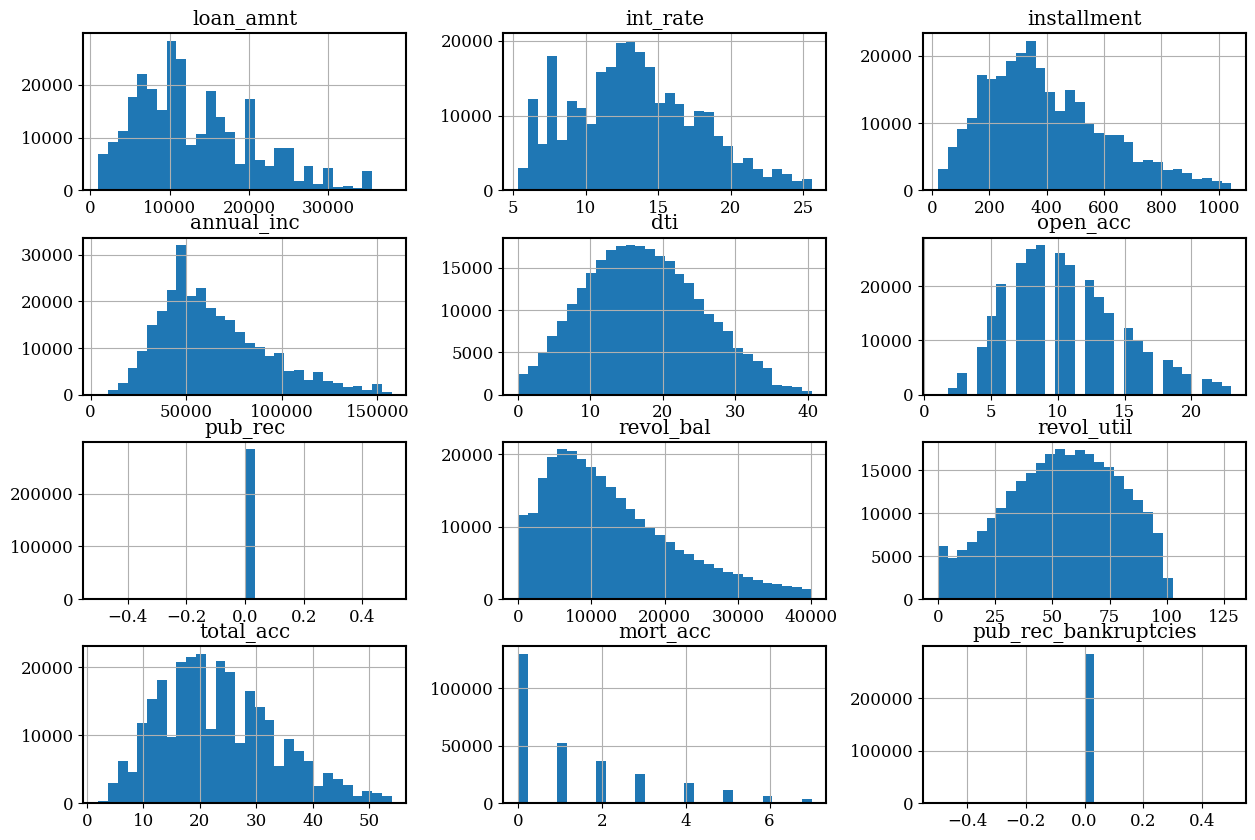

In [65]:
# Univariate Analysis (Visualizing distributions of continuous variables)
df.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(15, 10))
plt.show()

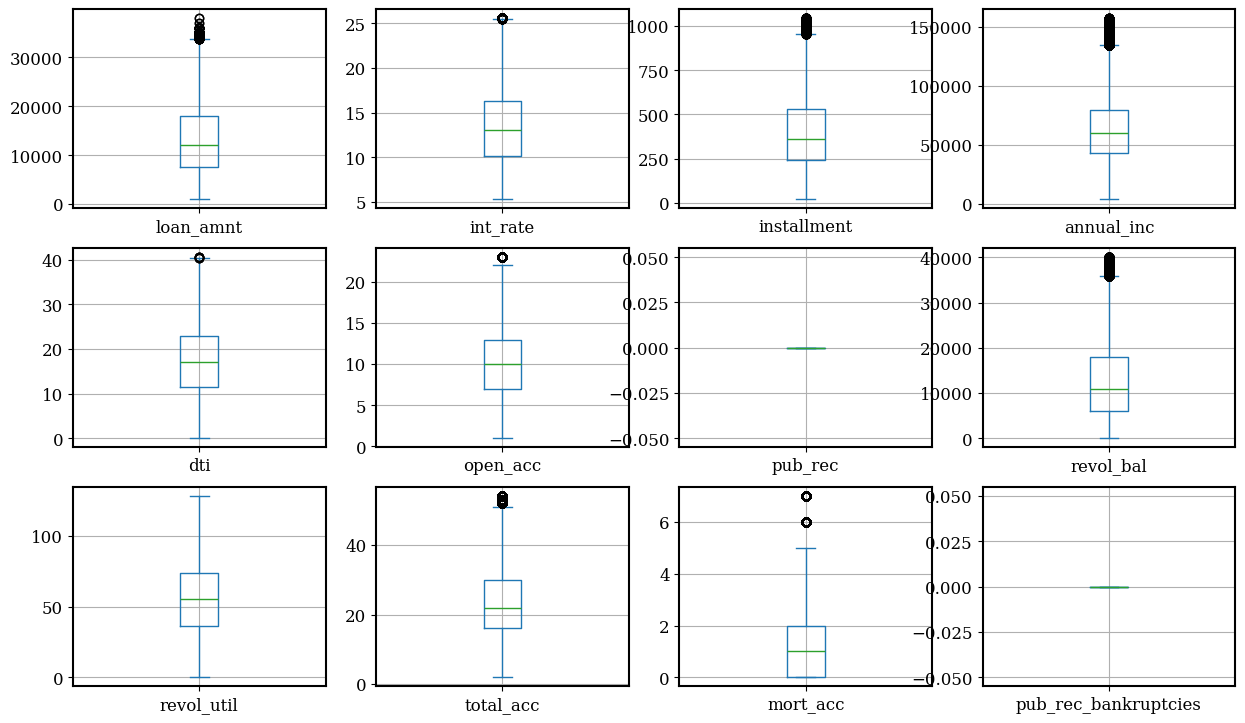

In [66]:
# Univariate Analysis (Visualizing distributions of continuous variables using box plots)
df.select_dtypes(include=['float64', 'int64']).plot(kind='box', subplots=True, layout=(5,4), figsize=(15, 15))
plt.show()

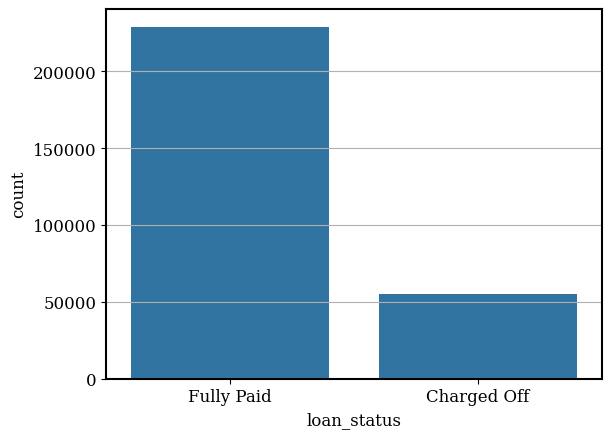

In [67]:
# Visualizing categorical variables (countplots for categorical features)
sns.countplot(x='loan_status', data=df)
plt.show()

### **6.2 - Multivariant Analysis**

Correlation Analysis

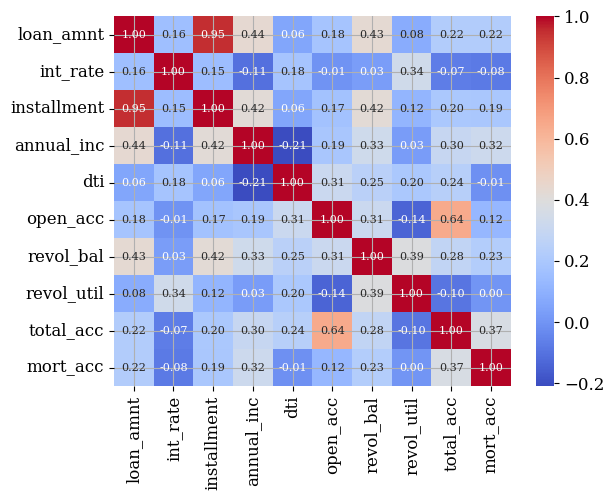

In [68]:
# Bivariate Analysis (Correlation between features and Loan_Status)
a = df.drop(['pub_rec', 'pub_rec_bankruptcies', 'loan_status'], axis=1)
sns.heatmap(a.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.show()

Distribution of loan_status by grade


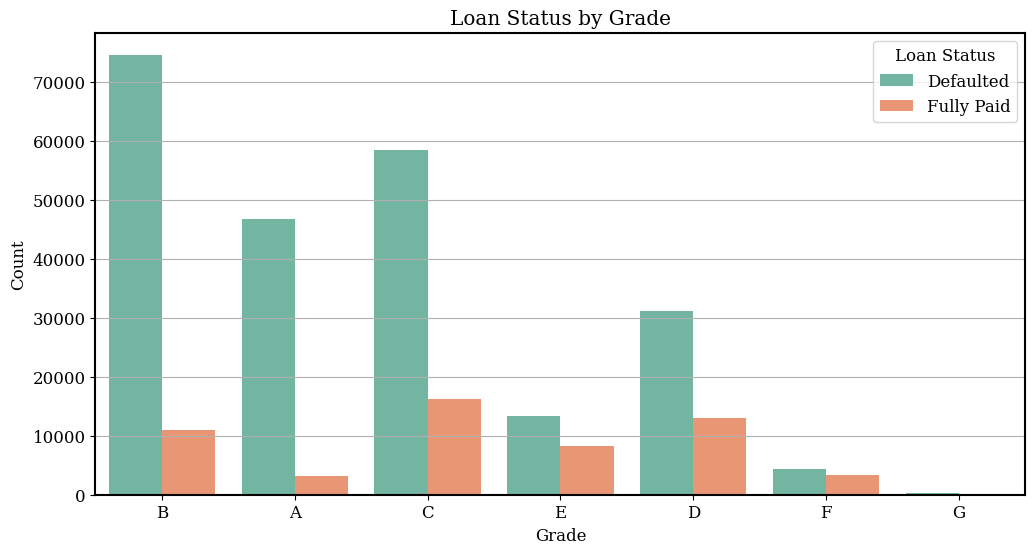

In [69]:
# Countplot of loan status grouped by grade
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='grade', hue='loan_status', palette='Set2')
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Defaulted', 'Fully Paid'])
plt.show()


### Insight from the Chart:  
- Higher-grade loans (e.g., A and B) have a smaller fraction of defaults, indicating lower risk.
- Lower-grade loans (e.g., F and G) exhibit a much higher proportion of defaults relative to fully paid loans.




## Key Insights from Exploratory Data Analysis (EDA)



#### 1. **Feature Distributions**
- Variables like `loan_amnt`, `installment`, and `int_rate` follow near-normal distributions, while `revol_util` and `dti` are right-skewed.
- Features like `pub_rec` and `pub_rec_bankruptcies` are concentrated at 0, indicating minimal public records or bankruptcies among borrowers.

#### 2. **Target Variable (Loan Status)**
- The dataset is imbalanced, with most loans being "Fully Paid" compared to "Charged Off," requiring techniques to address this for effective modeling.

#### 3. **Correlation Analysis**
- **Strong Correlation:** `loan_amnt` and `installment` are positively correlated.
- **Weak Correlations:** Features like `annual_inc` and `dti` show limited linear correlation with `loan_status`, indicating a need for deeper exploration.

---

### Actionable Insights
1. **Loan Grade:**  
   - Stricter approvals for lower grades (D, E, F, G) and risk-based pricing to account for higher default risks.  
2. **Imbalance Handling:**  
   - Apply techniques like SMOTE or ensemble methods to balance the `loan_status` classes.  
3. **Feature Engineering:**  
   - Transform skewed features (`revol_util`, `dti`) and investigate non-linear interactions for better predictions.

---

### Next Steps
- Balance the target variable using sampling techniques.
- Engineer and scale features to address skewness and uncover hidden patterns.
- Evaluate models using metrics like F1-score and AUC-ROC to balance risk mitigation and financial inclusivity.

## 6.3 Feature Engineering

PreProcessing - Training Dataset

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load dataset and clean column names
df = pd.read_csv("logistic_regression.csv")
df.columns = df.columns.str.strip()

# Extract pin code from address
df['pin_code'] = df['address'].str.split(',').str[-1].str.strip()

# Step 2: Initialize ml_df as a DataFrame for preprocessing
ml_df = pd.DataFrame()

# Step 3: Term Encoding
ml_df['term'] = df['term'].str.extract(r'(\d+)').astype(int)

# Step 4: Grade Encoding
ml_df['grade'] = df['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

# Step 5: Sub-Grade Encoding
df['sub_grade_letter'] = df['sub_grade'].str[0].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})
df['sub_grade_number'] = df['sub_grade'].str[1:].astype(int)
ml_df['sub_grade_encoded'] = (df['sub_grade_letter'] - 1) * 5 + df['sub_grade_number']

# Step 6: Employment Length Encoding
emp_length_mapping = {
    '10+ years': 10, '9 years': 9, '8 years': 8, '7 years': 7, '6 years': 6,
    '5 years': 5, '4 years': 4, '3 years': 3, '2 years': 2, '1 year': 1,
    '< 1 year': 0, np.nan: -1
}
ml_df['emp_length_encoded'] = df['emp_length'].map(emp_length_mapping)

# Step 7: One-Hot Encoding for Multiple Columns
one_hot_columns = ['home_ownership', 'verification_status', 'application_type']
df_encoded = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)
ml_df = pd.concat([
    ml_df,
    df_encoded.filter(like='home_ownership_').astype('int'),
    df_encoded.filter(like='verification_status_').astype('int'),
    df_encoded.filter(like='application_type_').astype('int')
], axis=1)

# Step 8: Credit History Length (Fixed)
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
ml_df['credit_history_length'] = 2024 - df['earliest_cr_line'].dt.year

# Step 9: Log Transformations
log_columns = ['annual_inc', 'loan_amnt', 'revol_bal']
for col in log_columns:
    ml_df[f'log_{col}'] = np.log1p(df[col])

# Step 10: Interaction Features
ml_df['debt_to_income_ratio'] = df['dti'] / df['annual_inc']
ml_df['installment_to_income_ratio'] = df['installment'] / df['annual_inc']

# Step 11: Target Variable Encoding
df['loan_status'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})
ml_df['loan_status'] = df['loan_status']

# Step 12: Purpose Encoding using Target Mean Encoding
purpose_target_mean = df.groupby('purpose')['loan_status'].mean()
ml_df['purpose_encoded'] = df['purpose'].map(purpose_target_mean)

# Step 13: Binary Flags
binary_flags = ['pub_rec', 'mort_acc', 'pub_rec_bankruptcies']
for col in binary_flags:
    ml_df[f'{col}_flag'] = (df[col] > 0).astype(int)

# Step 14: Columns Requiring No Transformation
no_transform_columns = ['installment', 'open_acc', 'pub_rec', 'total_acc', 'revol_util']
ml_df = pd.concat([ml_df, df[no_transform_columns]], axis=1)

# Step 15: Calculate mean target value for categorical variables
df['pin_code'] = df['address'].str.split(',').str[-1].str.strip()
categorical_columns = ['emp_title', 'title', 'pin_code', 'issue_d']
for column in categorical_columns:
    target_mean = df.groupby(column)['loan_status'].mean()
    ml_df[f'{column}_encoded'] = df[column].map(target_mean)

# Step 16: Encode 'initial_list_status'
ml_df['initial_list_status_encoded'] = df['initial_list_status'].map({'f': 0, 'w': 1})

# Step 17: Columns Not Transformed or Encoded
remaining_columns = set(df.columns) - set(ml_df.columns) - {'emp_length', 'emp_title', 'purpose', 'address', 'earliest_cr_line',
    'title', 'sub_grade', 'initial_list_status', 'home_ownership', 'application_type', 'verification_status', 'issue_d', 'pin_code'}

ml_df = pd.concat([ml_df, df[list(remaining_columns)]], axis=1)

# Step 18: Check for NaN or infinity in numerical columns before scaling
numerical_columns = ml_df.select_dtypes(include=['int64', 'float64']).columns

# Handle NaN or infinity values
ml_df[numerical_columns] = ml_df[numerical_columns].replace([np.inf, -np.inf], np.nan)

# Fill NaN values (using the median of each column)
ml_df[numerical_columns] = ml_df[numerical_columns].fillna(ml_df[numerical_columns].median())

# Step 19: Standard Scaling (Using MinMaxScaler)
scaler = MinMaxScaler()

# Apply MinMax scaling
ml_df[numerical_columns] = scaler.fit_transform(ml_df[numerical_columns])

# Step 20: Split the data into training (80%) and test (20%) sets
train_df, test_df = train_test_split(ml_df, test_size=0.2, random_state=42)

# Display the first few rows and the shape of the processed training set
display(train_df.head().T)
display(train_df.shape)
display(train_df.columns)

# Optionally, display the processed test set (for validation/evaluation)
display(test_df.head().T)
display(test_df.shape)
display(test_df.columns)


,320024,282427,103275,199642,56027
term,0.000000,0.000000,1.000000,1.000000,0.000000
grade,0.000000,0.000000,0.333333,0.333333,0.000000
sub_grade_encoded,0.117647,0.117647,0.382353,0.323529,0.000000
emp_length_encoded,0.363636,0.272727,1.000000,0.454545,0.454545
home_ownership_MORTGAGE,0.000000,1.000000,1.000000,1.000000,0.000000
home_ownership_NONE,0.000000,0.000000,0.000000,0.000000,0.000000
home_ownership_OTHER,0.000000,0.000000,0.000000,0.000000,0.000000
home_ownership_OWN,0.000000,0.000000,0.000000,0.000000,0.000000
home_ownership_RENT,1.000000,0.000000,0.000000,0.000000,1.000000
verification_status_Source Verified,1.000000,0.000000,1.000000,1.000000,1.000000


(316824, 43)

Index(['term', 'grade', 'sub_grade_encoded', 'emp_length_encoded', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'application_type_INDIVIDUAL', 'application_type_JOINT', 'credit_history_length', 'log_annual_inc', 'log_loan_amnt', 'log_revol_bal', 'debt_to_income_ratio', 'installment_to_income_ratio', 'loan_status', 'purpose_encoded', 'pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag', 'installment', 'open_acc', 'pub_rec', 'total_acc', 'revol_util', 'emp_title_encoded', 'title_encoded', 'pin_code_encoded', 'issue_d_encoded', 'initial_list_status_encoded', 'dti', 'sub_grade_letter', 'sub_grade_number', 'pub_rec_bankruptcies', 'mort_acc', 'int_rate', 'annual_inc', 'revol_bal', 'loan_amnt'], dtype='object')

,362323,220444,345899,93811,182096
term,1.000000,0.000000,0.000000,0.000000,0.000000
grade,0.333333,0.500000,0.500000,0.333333,0.166667
sub_grade_encoded,0.382353,0.470588,0.558824,0.382353,0.235294
emp_length_encoded,1.000000,0.272727,0.272727,0.181818,0.818182
home_ownership_MORTGAGE,1.000000,0.000000,0.000000,0.000000,1.000000
home_ownership_NONE,0.000000,0.000000,0.000000,0.000000,0.000000
home_ownership_OTHER,0.000000,0.000000,0.000000,0.000000,0.000000
home_ownership_OWN,0.000000,1.000000,0.000000,0.000000,0.000000
home_ownership_RENT,0.000000,0.000000,1.000000,1.000000,0.000000
verification_status_Source Verified,1.000000,0.000000,1.000000,0.000000,0.000000


(79206, 43)

Index(['term', 'grade', 'sub_grade_encoded', 'emp_length_encoded', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'application_type_INDIVIDUAL', 'application_type_JOINT', 'credit_history_length', 'log_annual_inc', 'log_loan_amnt', 'log_revol_bal', 'debt_to_income_ratio', 'installment_to_income_ratio', 'loan_status', 'purpose_encoded', 'pub_rec_flag', 'mort_acc_flag', 'pub_rec_bankruptcies_flag', 'installment', 'open_acc', 'pub_rec', 'total_acc', 'revol_util', 'emp_title_encoded', 'title_encoded', 'pin_code_encoded', 'issue_d_encoded', 'initial_list_status_encoded', 'dti', 'sub_grade_letter', 'sub_grade_number', 'pub_rec_bankruptcies', 'mort_acc', 'int_rate', 'annual_inc', 'revol_bal', 'loan_amnt'], dtype='object')

### **7. Status Classfication Model**

In [71]:
# Step 1: Separate Features (X) and Target (y)
X_train = train_df.drop(columns='loan_status')  # Features for training
y_train = train_df['loan_status']  # Target for training

X_test = test_df.drop(columns='loan_status')  # Features for testing
y_test = test_df['loan_status']  # Target for testing

In [72]:
from sklearn.preprocessing import MinMaxScaler

# Step 2: Scale the features using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set (use the same scaler for both train and test)
X_test_scaled = scaler.transform(X_test)

In [73]:
from sklearn.linear_model import LogisticRegression

# Step 3: Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model on the training data
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

### 4.0 Results Evaluation


In [74]:
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 4: Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# # Step 6: Save the model to a pickle file
with open('log_reg_model.pkl', 'wb') as model_file:
    pickle.dump(log_reg, model_file)

# Optionally: Load the model from the pickle file
with open('log_reg_model.pkl', 'rb') as model_file:
    loaded_log_reg = pickle.load(model_file)

# Verify the loaded model works
y_pred_loaded = loaded_log_reg.predict(X_test_scaled)
print(f"\nAccuracy of loaded model: {accuracy_score(y_test, y_pred_loaded):.4f}")


Accuracy: 0.9440

Confusion Matrix:
[[12033  3544]
 [  894 62735]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84     15577
         1.0       0.95      0.99      0.97     63629

    accuracy                           0.94     79206
   macro avg       0.94      0.88      0.91     79206
weighted avg       0.94      0.94      0.94     79206


Accuracy of loaded model: 0.9440



- **Accuracy (94.40%)**: The model correctly predicts the outcome 94.40% of the time, which is excellent.

- **Confusion Matrix**: The model correctly predicted 62,735 "Fully Paid" loans (True Positives) and 12,033 "Charged Off" loans (True Negatives). However, it made 3,544 False Positives and 894 False Negatives.

- **Precision (Fully Paid, 95%)**: When the model predicts a loan as "Fully Paid", it's correct 95% of the time, meaning few false positives.

- **Recall (Fully Paid, 99%)**: The model correctly identifies 99% of actual "Fully Paid" loans, catching almost all of them.

- **F1-Score (Fully Paid, 97%)**: The F1-score balances precision and recall, showing the model is great at predicting "Fully Paid" loans.

- **Class Imbalance**: The model performs well despite more "Fully Paid" loans than "Charged Off" loans, with a weighted average F1-score of 0.94.

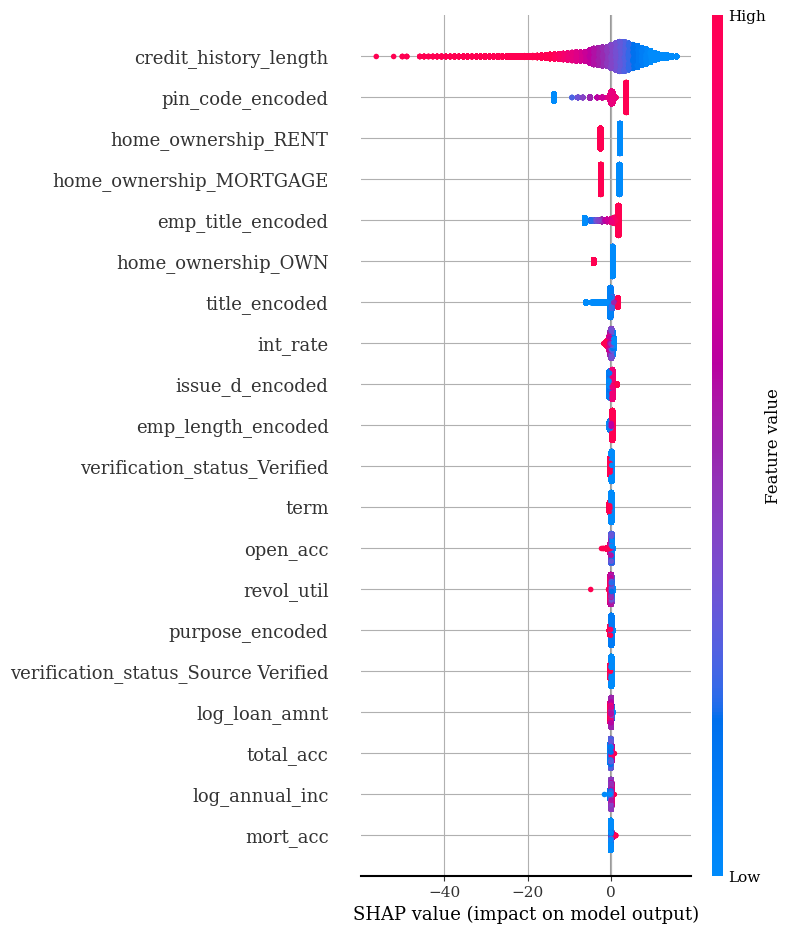

In [75]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(log_reg, X_train)

# Compute SHAP values for the training data
shap_values = explainer(X_train)

# Plot the summary of SHAP values to see feature importance
shap.summary_plot(shap_values, X_train)

### Display model coefficients with column names

In [76]:
# Assuming these are the original feature names from `X_train`
feature_names = X_train.columns.tolist()  # Get feature names from the original DataFrame

# Now use the same procedure as before
coefficients = log_reg.coef_[0]  # Coefficients for each feature

# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients for better interpretability
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the coefficients sorted by absolute value
print("\nModel Coefficients with Features:")
print(coef_df[['Feature', 'Coefficient']])



Model Coefficients with Features:
                                Feature  Coefficient
30                     pin_code_encoded    17.286509
28                    emp_title_encoded     8.067526
29                        title_encoded     7.603061
27                           revol_util    -5.182516
8                   home_ownership_RENT    -4.636152
7                    home_ownership_OWN    -4.567586
4               home_ownership_MORTGAGE    -4.428829
12               application_type_JOINT    -3.736688
11          application_type_INDIVIDUAL    -3.320388
24                             open_acc    -2.673574
38                             int_rate    -2.362038
14                       log_annual_inc     2.298214
31                      issue_d_encoded     1.844655
39                           annual_inc     1.459566
37                             mort_acc     1.194727
40                            revol_bal     1.148468
13                credit_history_length    -1.043151
26         

### ROC AUC (Receiver Operating Characteristic - Area Under the Curve)

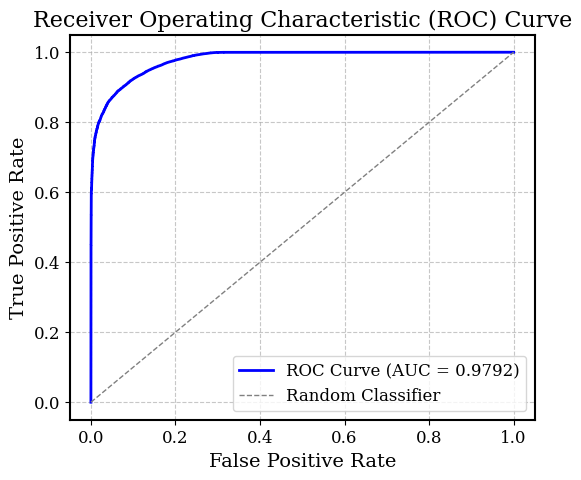

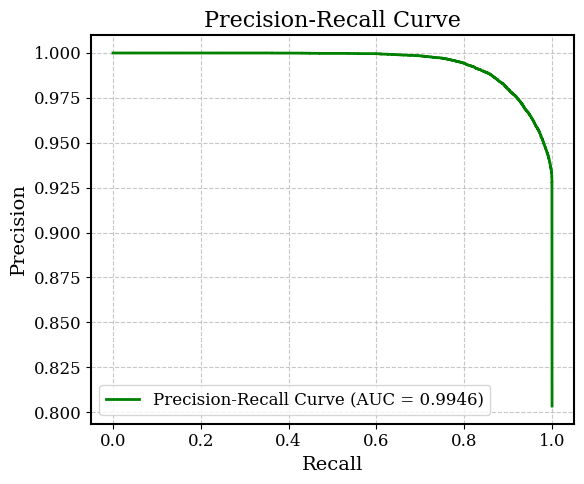

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.77      0.84     15577
         1.0       0.95      0.99      0.97     63629

    accuracy                           0.94     79206
   macro avg       0.94      0.88      0.91     79206
weighted avg       0.94      0.94      0.94     79206

ROC AUC Score: 0.9792
Precision-Recall AUC Score: 0.9946


In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, classification_report

# Set publication-friendly font and style
plt.rcParams.update({'font.size': 12, 'font.family': 'serif', 'axes.linewidth': 1.5, 'axes.grid': True})

# Predict probabilities for the positive class (loan_status = 1)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Compute Precision-Recall curve and AUC score
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='g', lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plots
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

# Print Classification Report and AUC scores
print("Classification Report:\n", classification_report(y_test, log_reg.predict(X_test_scaled)))
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")


### Inference and Insights on the ROC and Precision-Recall Curves for Loan Prediction:

1. **Model Performance (ROC Curve):**  
   The ROC curve shows excellent performance with an **AUC of 0.9792**. This indicates that the model is highly capable of distinguishing between approved (Class 1) and rejected (Class 0) loans. A low False Positive Rate (FPR) and a high True Positive Rate (TPR) reflect strong classification performance across different thresholds.

2. **Precision-Recall Curve (Loan Approval Focus):**  
   The Precision-Recall curve has an **AUC of 0.9946**, highlighting outstanding performance, especially in scenarios where the positive class (approved loans) is more critical. High precision ensures the model rarely approves unqualified borrowers, while high recall ensures most eligible borrowers are correctly approved.

3. **Actionable Insight:**  
   - If **reducing bad loans (false positives)** is a priority, fine-tune the threshold to maximize precision.  
   - If **approving all eligible loans (minimizing false negatives)** is critical, optimize for high recall.  
   - Given the high AUCs in both curves, the model is already well-suited for loan prediction and requires only minor adjustments for business-specific trade-offs.



# Trade-off Question

**Q1: How can we ensure our model detects real defaulters with fewer false positives?**  
Optimize the decision threshold, prioritize recall for defaulters, and balance precision-recall trade-offs to reduce false positives while maintaining high recall for accurate default predictions.

**Q2: How can we address NPAs while playing safe in loan disbursement?**  
Implement stricter creditworthiness checks, use robust risk models, and incorporate predictive analytics to minimize NPAs while balancing safe loan disbursement with profitable financing opportunities.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Step 1: Load the Dataset


# Step 4: Predict Probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Step 5: Create a DataFrame with Actual and Predicted Probabilities
results_df = pd.DataFrame({
    'y_test': y_test,                # Actual target values
    'y_pred_proba': y_pred_proba     # Predicted probabilities
})

# Step 6: Define the Threshold and Calculate Confusion Matrix Components
chosen_threshold = 0.5
tp = ((results_df['y_test'] == 1) & (results_df['y_pred_proba'] >= chosen_threshold)).sum()
fn = ((results_df['y_test'] == 1) & (results_df['y_pred_proba'] < chosen_threshold)).sum()
fp = ((results_df['y_test'] == 0) & (results_df['y_pred_proba'] >= chosen_threshold)).sum()
tn = ((results_df['y_test'] == 0) & (results_df['y_pred_proba'] < chosen_threshold)).sum()

# Step 7: Plot the Distributions of Predicted Probabilities
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Plot KDEs for both classes
sns.kdeplot(results_df[results_df['y_test'] == 0]['y_pred_proba'], label="Class 0 (actual)", shade=True, color="#1f77b4", alpha=0.7)
sns.kdeplot(results_df[results_df['y_test'] == 1]['y_pred_proba'], label="Class 1 (actual)", shade=True, color="#ff7f0e", alpha=0.7)

# Add vertical line for the threshold
plt.axvline(chosen_threshold, color='green', linestyle='--', linewidth=1.5, label=f'Threshold = {chosen_threshold:.2f}')

# Add annotations for confusion matrix components
conf_matrix_text = f"TP = {tp:,}\nFN = {fn:,}\nFP = {fp:,}\nTN = {tn:,}"
plt.text(chosen_threshold + 0.03, plt.gca().get_ylim()[1] * 0.7,
         conf_matrix_text,
         fontsize=12,
         bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

# Titles and labels
plt.title("Distribution of Predicted Probabilities with Highlighted Threshold", fontsize=16, weight='bold')
plt.xlabel("Predicted Probability", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Adjust legend position to the left
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(-0.1, 1))

# Display the plot
plt.tight_layout()
plt.show()

# Step 8: Print ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")


AttributeError: 'LogisticRegression' object has no attribute 'classes_'

This chart evaluates a loan prediction model’s performance by visualizing the distribution of predicted probabilities for approved (Class 1) and rejected (Class 0) loans.

1. **Blue (Class 0):** Represents rejected loans (actual negatives).  
2. **Orange (Class 1):** Represents approved loans (actual positives).  
3. **Threshold (0.5):** The green vertical line at 0.5 determines whether a loan is approved or rejected. Loans with predicted probabilities above 0.5 are approved, while those below are rejected.

### Performance Metrics (Confusion Matrix):
- **True Positives (62,735):** Loans correctly approved (borrowers qualified and received loans).  
- **False Negatives (894):** Loans wrongly rejected (eligible borrowers were denied).  
- **False Positives (3,544):** Loans wrongly approved (unqualified borrowers received loans).  
- **True Negatives (12,033):** Loans correctly rejected (unqualified borrowers were denied).  

### Insights from the Chart:
- The blue and orange curves are mostly separated, indicating the model performs well overall.  
- There’s a small overlap near the threshold (0.5), causing some misclassifications (FP and FN).  
- False negatives (894) are low, meaning the model rarely denies loans to eligible borrowers.  
- False positives (3,544) are relatively higher, suggesting some unqualified borrowers are being approved, which can lead to financial risks.

### Actions:
1. **Reduce Bad Loans (FP):** Slightly increase the threshold above 0.5 to reduce unqualified approvals.  
2. **Approve More Eligible Loans (FN):** If rejecting eligible borrowers is more costly, lower the threshold slightly to catch more qualified applicants.  
3. **Evaluate Business Impact:** To Adjust the threshold based on the business's risk tolerance and objectives—e.g., minimizing financial losses vs. maximizing loan approvals.  



### Tradeoff Questions:
- How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it. <br>
- Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

In [ ]:
df = pd.read_csv('logistic_regression.csv')

In [ ]:
"""
1. What percentage of customers have fully paid their Loan Amount?

Answer:
"""

(df[df['loan_status']=="Fully Paid"]).shape[0]/df.shape[0]

In [ ]:
"""
2. Comment about the correlation between Loan Amount and Installment features.

Answer:
"""

df['loan_amnt'].corr(df['installment'])

In [ ]:
"""
3. The majority of people have home ownership as _______.

Answer:
"""
df['home_ownership'].mode()

In [ ]:
"""
4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

"""
# df.groupby('grade')['loan_status'].value_counts(normalize=True)
display(pd.crosstab(df['grade'],df['loan_status'], normalize = 'index'))

True

In [ ]:
"""
5. Name the top 2 afforded job titles.
"""

df['emp_title'].value_counts().head(2)


In [ ]:
"""
6. Thinking from a bank's perspective, which metric should our primary focus be on..
 ROC AUC
 Precision
 Recall
 F1 Score
"""

"""
Answer:

- Recall: Essential for minimizing false negatives, ensuring risky customers are correctly identified.
- F1 Score: Balances Recall and Precision, making it the most suitable choice for imbalanced datasets.
- Banks should prioritize metrics that reduce potential loan default risks.
"""

In [ ]:
"""
7. How does the gap in precision and recall affect the bank?
"""

"""
Answer:

- Low precision means approving bad loans (more NPAs).
- Low recall means rejecting good customers.

When the gap between precision and recall grows, the bank makes more wrong decisions. A balance is needed to reduce mistakes and make better lending choices.
"""

In [ ]:
"""
8. Which were the features that heavily affected the outcome?
"""
print(coef_df[['Feature', 'Coefficient']].head(5))

In [ ]:
"""
9. Will the results be affected by geographical location? (Yes/No)
"""


from scipy.stats import chi2_contingency

# Hypotheses
H0 = "Results have no effect on the geographical location (Pin Code)."
HA = "Results are affected by the geographical location (Pin Code)."

# Example: Assuming 'df' is your DataFrame with 'pin_code' and 'loan_status' columns
# Replace 'df' with your actual DataFrame
# 'pin_code' represents geographical location, and 'loan_status' represents loan outcomes.

# Step 1: Display a crosstab of 'pin_code' and 'loan_status'
df['pin_code'] = df['address'].str.split(',').str[-1].str.strip()
df["address"].str.split("")

contingency_table = pd.crosstab(df['pin_code'], df['loan_status'])
display(contingency_table)

# Step 2: Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Step 3: Display the results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Step 4: Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H0: Results are affected by geographical location (Pin Code).")
else:
    print("Fail to Reject H0: Results have no effect on geographical location (Pin Code).")
